## *Machine Learning approaches to the classification problem for autism spectrum disorder* 

Neste trabalho, utilizaremos o dataset público "Autistic Spectrum Disorder Screening Data for Adult" disponibilizado pelo [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult#). O conjunto de dados foi doado pelo Prof. Fadi Thabtah, após a publicação do artigo ["Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment"](https://dl.acm.org/doi/10.1145/3107514.3107515). 


Os dados que investigamos aqui contêm pequenas alterações em relação ao conjunto original, como a remoção da variável 'age_desc' e registros com entradas ausentes ou formatadas incorretamente. Existem poucos artigos publicados disponíveis online, já que o conjunto de dados foi disponibilizado há pouco tempo e, como resultado, referências a um modelo de benchmark são muito raras.

O Transtorno do Espectro Autista (TEA) é uma condição neurodesenvolvimental associada a altos custos com saúde, e o diagnóstico precoce pode reduzir significativamente esses custos. Infelizmente, o tempo de espera para um diagnóstico de TEA é longo, e os procedimentos não são custo-efetivos. O impacto econômico do autismo e o aumento no número de casos de TEA em todo o mundo revelam a necessidade urgente de desenvolver métodos de triagem que sejam eficazes e de fácil implementação. Portanto, uma triagem para TEA que seja acessível e eficiente em termos de tempo é iminente, para ajudar os profissionais de saúde e informar os indivíduos sobre a necessidade de um diagnóstico clínico formal.

O rápido crescimento do número de casos de TEA no mundo exige conjuntos de dados relacionados a traços comportamentais. No entanto, esses conjuntos são raros, dificultando análises detalhadas para melhorar a eficiência, sensibilidade, especificidade e precisão preditiva do processo de triagem para TEA. Atualmente, há pouquíssimos conjuntos de dados relacionados ao autismo, associados a triagens ou dados clínicos, e a maioria deles é de natureza genética. Assim, propomos um novo conjunto de dados voltado para a triagem de autismo em adultos, contendo 20 variáveis a serem utilizadas em análises, especialmente na identificação de traços autísticos influentes e no aprimoramento da classificação de casos de TEA. Nesse conjunto, registramos dez variáveis comportamentais (AQ-10-Adult) e dez características individuais, que se mostraram eficazes em detectar casos de TEA em estudos de comportamento.




### Conteúdos: 
* 1. Importação dos datasets 
* 2. Análise preliminar
* 3. Limpeza dos datasets
* 4. Análise descritiva 





## 1. Importação dos datasets

Iniciamos o tratamento do dataset e sua preparação importando o arquivo 'autism-screening' como um dataframe Pandas.

In [28]:
import pandas as pd 
import numpy as np 

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


In [29]:
df = pd.read_csv("data/autism_screening.csv")

df.head() 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [31]:
#Dimensões do dataset
print("Número de instâncias:", df.shape[0])
print("Número de features:", df.shape[1])

# Colunas (features) do dataset
df.columns


Número de instâncias: 704
Número de features: 21


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

Verificamos que o dataset possui 704 instâncias e 21 features, conforme descrito na página onde o dataset encontra-se [disponível](https://archive.ics.uci.edu/dataset/426/autism+screening+adult#). Nele, também encontramos uma descrição do dataset e de suas features, que pode ser originalmente acessado pelo pdf. Relacionaremos aqui as colunas no dataframe, com a descrição e interpretação dessas features e como essas estão armazenadas, isto é, seu tipo. 



In [32]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

| **Atributo**            | **Nome da Variável**    | **Tipo**                   | **Descrição**                                                                 |
|-------------------------|-------------------------|----------------------------|------------------------------------------------------------------------------|
| Idade                   | age                     | Númerico (float)             | Idade em anos                                                                |
| Gênero                  | gendar                  | String (m/f)               | Gênero                                                                       |
| Etnia                   | ethnicity               | String                     | Etnias do participante em formato de texto                                   |
| Icterícia ao nascer     | jundice                 | String [yes/no]           | Indica se o indivíduo teve icterícia ao nascer                               |
| Autismo na família      | autism                  | String                   | Indica se há histórico de autismo em membros da família                      |
| País de residência      | country_of_res          | String                     | País de residência do participante em formato de texto                                          |
| Uso anterior do app     | used_app_before         | String [yes/no]           | Indica se o indivíduo já utilizou o app anteriormente                        |
| Relacionamento          | relation                | String                     | Quem está realizando o teste (parent, self, caregiver, medical staff, etc.)   |
| Tipo de método de triagem | screening_method_type  | String                     | Método de triagem utilizado                                                  |
| Perguntas 1 a 10        | A1-10_Score    | Binário [0,1]              | Respostas para as perguntas baseadas no método de triagem                    |
| Pontuação da Triagem    | result                  | Numérico (inteiro)                    | Pontuação final obtida com base no método de triagem. O valor foi computado de maneira automatizada
| Diagnóstico | Class/ASD |  String ["YES"/"NO"] | Indica se o paciente é diagnosticado ou não com autismo.              


## 2. Pré-processamento dos dados
Antes de utilizarmos uma base de dados para análises ou como entrada para modelos de *machine learning*, estes precisam ser limpos e formatados, e até mesmo reestruturados, para que esses sejam interpretados de forma adequada computacionalmente e também para os algoritmos de aprendizado de máquina. A etapa de pré-processamento é fundamental, pois pode ajudar nos resultados de análises e no poder preditivo de algoritmos de aprendizado.

Algo que é perceptível ao visualizar o dataset é a existência de valores faltantes para alguns atributos, conforme o esperado, uma vez que na descrição do dataset nos é informado que existem valores faltantes. Entretanto, estes estão simplesmente representados pelo caractere '?' e não por um valor nulo de fato. Como consequência, ao não se atentar a esse ponto e simplesmente utilizarmos o método info() pela biblioteca Pandas, estes não serão identificados. 


In [33]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

### 2.1 Análise dos atributos

Nesse ponto, realizaremos uma análise mais detalhada das nossas features (atributos): 

* análise de valores nulos
* nome das colunas
* identificação dos valores únicos

Como pontuado anteriormente, os valores faltantes não estão explicitamente (claros) no dataset. Portanto, para iniciar esse pré-processamento dos dados vamos realizar essa substituição.



In [34]:
df = df.replace('?', np.nan) 

Antes de aprofundarmos na análise do dataset, vamos renomear as colunas de forma que tornem-as mais representativas, facilitando a compreensão e futuras análises.

In [35]:
df = df.rename(columns={'austim' : 'relative_with_autism', 'contry_of_res' : 'country_of_residence', 'Class/ASD' : 'diagnosis'})

In [36]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   A1_Score              704 non-null    int64  
 1   A2_Score              704 non-null    int64  
 2   A3_Score              704 non-null    int64  
 3   A4_Score              704 non-null    int64  
 4   A5_Score              704 non-null    int64  
 5   A6_Score              704 non-null    int64  
 6   A7_Score              704 non-null    int64  
 7   A8_Score              704 non-null    int64  
 8   A9_Score              704 non-null    int64  
 9   A10_Score             704 non-null    int64  
 10  age                   702 non-null    float64
 11  gender                704 non-null    object 
 12  ethnicity             609 non-null    object 
 13  jundice               704 non-null    object 
 14  relative_with_autism  704 non-null    object 
 15  country_of_residence  7

Após uma representação explicíta dos valores nulos em nosso dataset, verificamos que existem instâncias com valores faltantes de *relation*, que refere-se a pessoa que realizou o teste, *ethnicity*, etnia do participante e *age*, sua idade. 

Com o método .loc(), podemos localizar as instâncias que possuem essas features faltantes. 

In [37]:
df_null = df.loc[(df['age'].isnull()) | (df['relation'].isnull()) | (df['ethnicity'].isnull())]
df_null

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,relative_with_autism,country_of_residence,used_app_before,result,age_desc,relation,diagnosis
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO
12,0,1,1,1,1,1,0,0,1,0,...,f,NaN,no,no,Bahamas,no,6.0,18 and more,NaN,NO
13,1,0,0,0,0,0,1,1,0,1,...,m,NaN,no,no,Austria,no,4.0,18 and more,NaN,NO
14,1,0,0,0,0,0,1,1,0,1,...,f,NaN,no,no,Argentina,no,4.0,18 and more,NaN,NO
19,0,0,0,0,0,0,1,1,0,1,...,m,NaN,yes,no,United Arab Emirates,no,3.0,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0,0,0,0,0,0,0,0,0,1,...,f,NaN,no,no,United States,no,1.0,18 and more,NaN,NO
658,0,0,1,1,0,0,1,0,0,0,...,m,NaN,no,no,Azerbaijan,no,3.0,18 and more,NaN,NO
659,1,1,1,1,1,1,0,0,1,1,...,m,NaN,no,no,Pakistan,no,8.0,18 and more,NaN,YES
666,0,0,0,0,0,0,0,1,0,0,...,m,NaN,no,no,Iraq,no,1.0,18 and more,NaN,NO


Tendo conhecimento das 95 instâncias que possuem esse valores nulos, podemos analisar, futuramente, o impacto dessas features no treinamento e resultado do nosso modelo.

 Nesse ponto, adentramos na discussão em como lidar com os valores faltantes. Um dado faltante pode ter diferentes origens: seja por erro na inserção manual, erro de digitação ou o dado pode simplesmente não existir. Uma das formas mais simples de lidarmos com os dados faltantes é optando pela remoção destes. 
 
 Em outras palavras, mantendo apenas as instâncias que apresentarem todos os dados completos, estratégia que será adotada.



In [38]:
df.dropna(inplace=True)

Vamos partir para uma análise mais detalhada das features e seus valores.

In [39]:
df.nunique() 

A1_Score                 2
A2_Score                 2
A3_Score                 2
A4_Score                 2
A5_Score                 2
A6_Score                 2
A7_Score                 2
A8_Score                 2
A9_Score                 2
A10_Score                2
age                     46
gender                   2
ethnicity               11
jundice                  2
relative_with_autism     2
country_of_residence    60
used_app_before          2
result                  11
age_desc                 1
relation                 5
diagnosis                2
dtype: int64

Aplicando o método .nunique(), podemos analisar os valores únicos das variáveis. Etapa necessária garantir que a substituição dos valores string para as variáveis binárias ocorrerá adequadamente. 

* Valores para as saídas binárias, isto é, a existência de apenas dois valores únicos.

* Age_desc possui apenas um único valor, sendo "18 and more", portanto significa que não trará contribuição para futuros modelos nem para a análise. 


In [21]:
df = df.replace({"yes" : 1, "no": 0})
df = df.replace({"YES" : 1, "NO": 0})

df.head() 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,relative_with_autism,country_of_residence,used_app_before,result,age_desc,relation,diagnosis
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,0,0,United States,0,6.0,18 and more,Self,0
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,0,1,Brazil,0,5.0,18 and more,Self,0
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,1,1,Spain,0,8.0,18 and more,Parent,1
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,0,1,United States,0,6.0,18 and more,Self,0
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,1,0,United States,0,9.0,18 and more,Self,1


Analisando de maneira aprofundada os valores das features:



In [ ]:
#Separar as features categóricas e as numéricas
categoric_columns = [column for column in df.columns if df[column].dtype == 'object'] 
numeric_columns = [column for column in df.columns if df[column].dtype != 'object']

print("Variáveis categóricas: ", categoric_columns)

print("Variáveis numéricas: ",  numeric_columns)

Valores únicos para cada uma das features categóricas

In [ ]:
for column in categoric_columns: 
    print(f"{column} --> valores: {df[column].unique()}\n")

O valor "Others" se encontra repetido na variável etnia. Portanto, vamos realizar essa assimilação apenas para "Others"

In [ ]:
df['ethnicity'] = df['ethnicity'].replace({'others' : "Others"})

print(df['ethnicity'].unique())

Agora para as variáveis numéricas

In [ ]:
for column in numeric_columns: 
    print(f"{column} --> valores: {df[column].unique()}\n")

In [22]:
#Reminder of the features:
print(df.dtypes)

number_records = len(df)
number_with_asd = len(df[df['diagnosis'] == 1])
number_with_no_asd = len(df[df['diagnosis'] == 0])

print( "Número total de instâncias: ", number_records)
print("Número de indivíduos diagnosticados com ASD: ", number_with_asd)
print("Número de indivíduos que não foram diagnosticados com ASD: ", number_with_no_asd)



A1_Score                  int64
A2_Score                  int64
A3_Score                  int64
A4_Score                  int64
A5_Score                  int64
A6_Score                  int64
A7_Score                  int64
A8_Score                  int64
A9_Score                  int64
A10_Score                 int64
age                     float64
gender                   object
ethnicity                object
jundice                   int64
relative_with_autism      int64
country_of_residence     object
used_app_before           int64
result                  float64
age_desc                 object
relation                 object
diagnosis                 int64
dtype: object
Número total de instâncias:  609
Número de indivíduos diagnosticados com ASD:  180
Número de indivíduos que não foram diagnosticados com ASD:  429


# 2. Visualization

Vamos iniciar a visualização dos dados utilizando o Seaborn.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style = 'whitegrid', color_codes=True)

<Axes: xlabel='diagnosis', ylabel='count'>

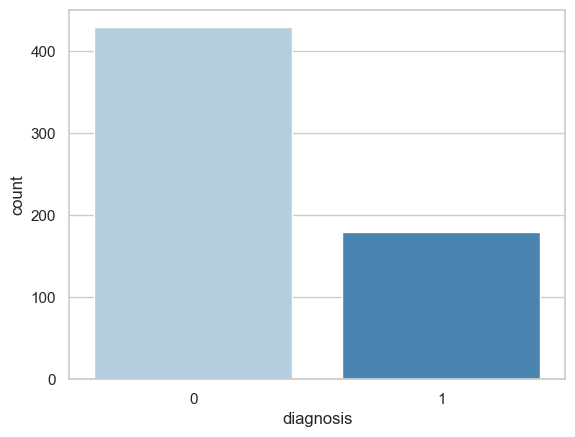

In [24]:
sns.countplot(data=df, x = 'diagnosis', palette='Blues')


In [212]:
per_diagnosed_asd = (number_with_asd / number_records) * 100

print(f"Porcentagem de indivíduos diagnosticados com autismo: {per_diagnosed_asd:.2f}%")

Porcentagem de indivíduos diagnosticados com autismo: 29.56%


Como é visível, a quantidade de indivíduos que não são diagnosticados com autismo predomina no nosso dataset. Then we need find some insights that help our model predict correctly 1 Class. 70% dos dados, aproximadamente referem-se a classe 0 que não é diagnosticada, portanto, trata-se de um aspecto a se atentar ao realizarmos a divisão do nosso dataset.

In [213]:
df.describe() 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,jundice,autism,used_app_before,result,diagnosis
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.00000,609.000000,609.000000
mean,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,30.215107,0.096880,0.139573,0.01642,5.077176,0.295567
std,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,17.287470,0.296038,0.346828,0.12719,2.522717,0.456672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,3.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.00000,5.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,0.000000,0.000000,0.00000,7.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,1.000000,1.000000,1.00000,10.000000,1.000000


Idade máxima 383 anos kkkkk

In [214]:
df = df[df['age'] != 383]

In [217]:
df['ethnicity'] = df['ethnicity'].replace({'others' : "Others"})

print(df['ethnicity'].unique())


['White-European' 'Latino' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish']


## 2.1 Análise descritiva

##### TO DO: Analisar as fetuares no sentido da análise: 

Vamos iniciar a análise dos dados categóricos. De variáveis numéricas possuímos apenas a "result", sendo as restantes valores binários. 

Possuímos as variáveis de gênero, etnia e país de residência dos participantes, e a pessoa que fez o teste.

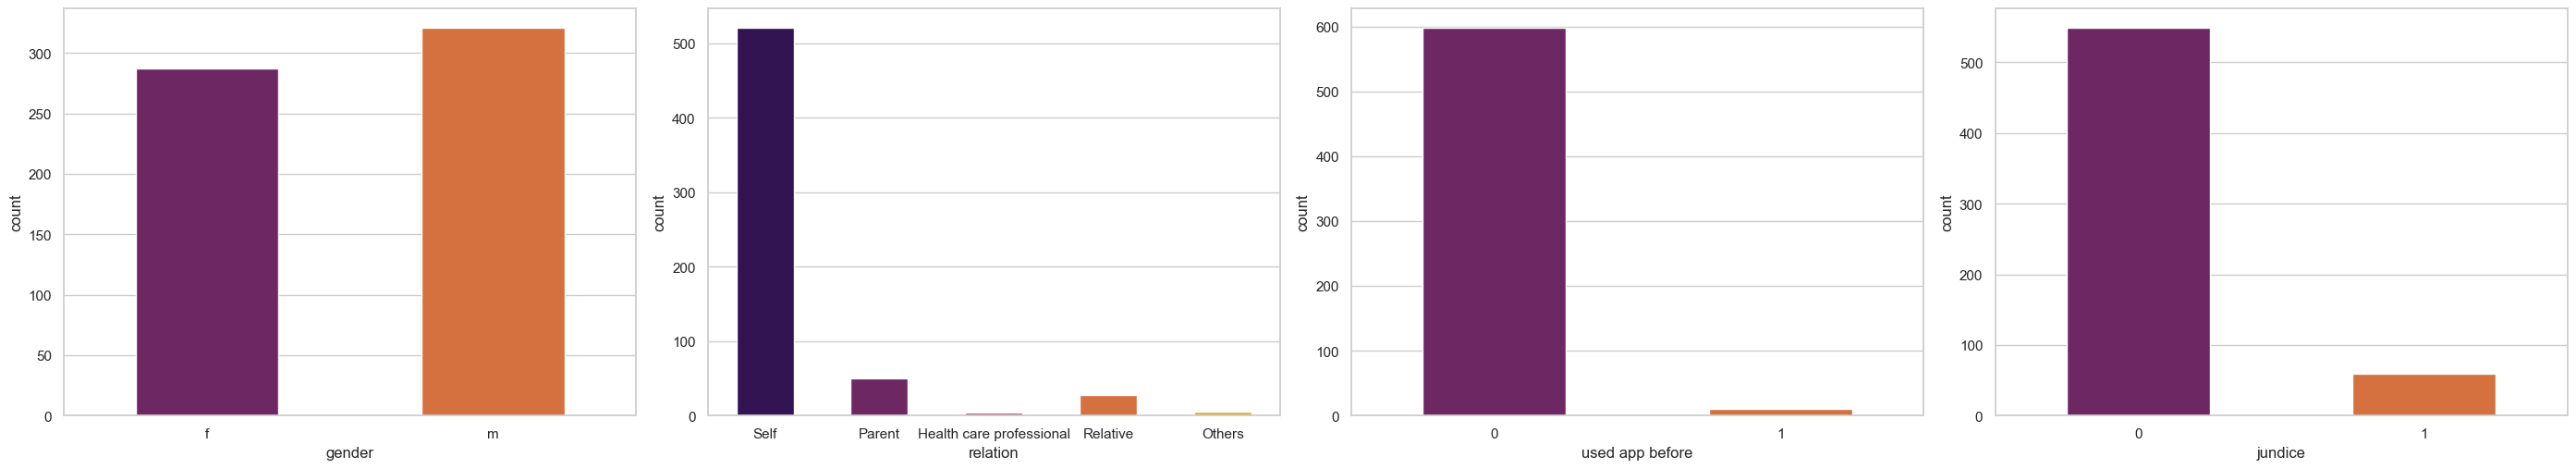

In [250]:

plt.figure(figsize=(35, 25))

# Gender plot

ax = plt.subplot(5,5, 1)
sns.countplot(df, x = 'gender', width = 0.5, palette='inferno')
plt.xlabel('gender')


# Relation plot 
ax = plt.subplot(5, 5, 2)
sns.countplot(df, x = 'relation', width = 0.5, palette = 'inferno')
plt.xlabel('relation')

# used_app_before
ax = plt.subplot(5, 5, 3)
sns.countplot(df, x = 'used_app_before', width = 0.5, palette = 'inferno')
plt.xlabel('used app before')

ax = plt.subplot(5, 5, 4)
sns.countplot(df, x = 'jundice', width = 0.5, palette = 'inferno')
plt.xlabel('jundice')

plt.tight_layout() 
plt.show()


<Axes: xlabel='ethnicity', ylabel='count'>

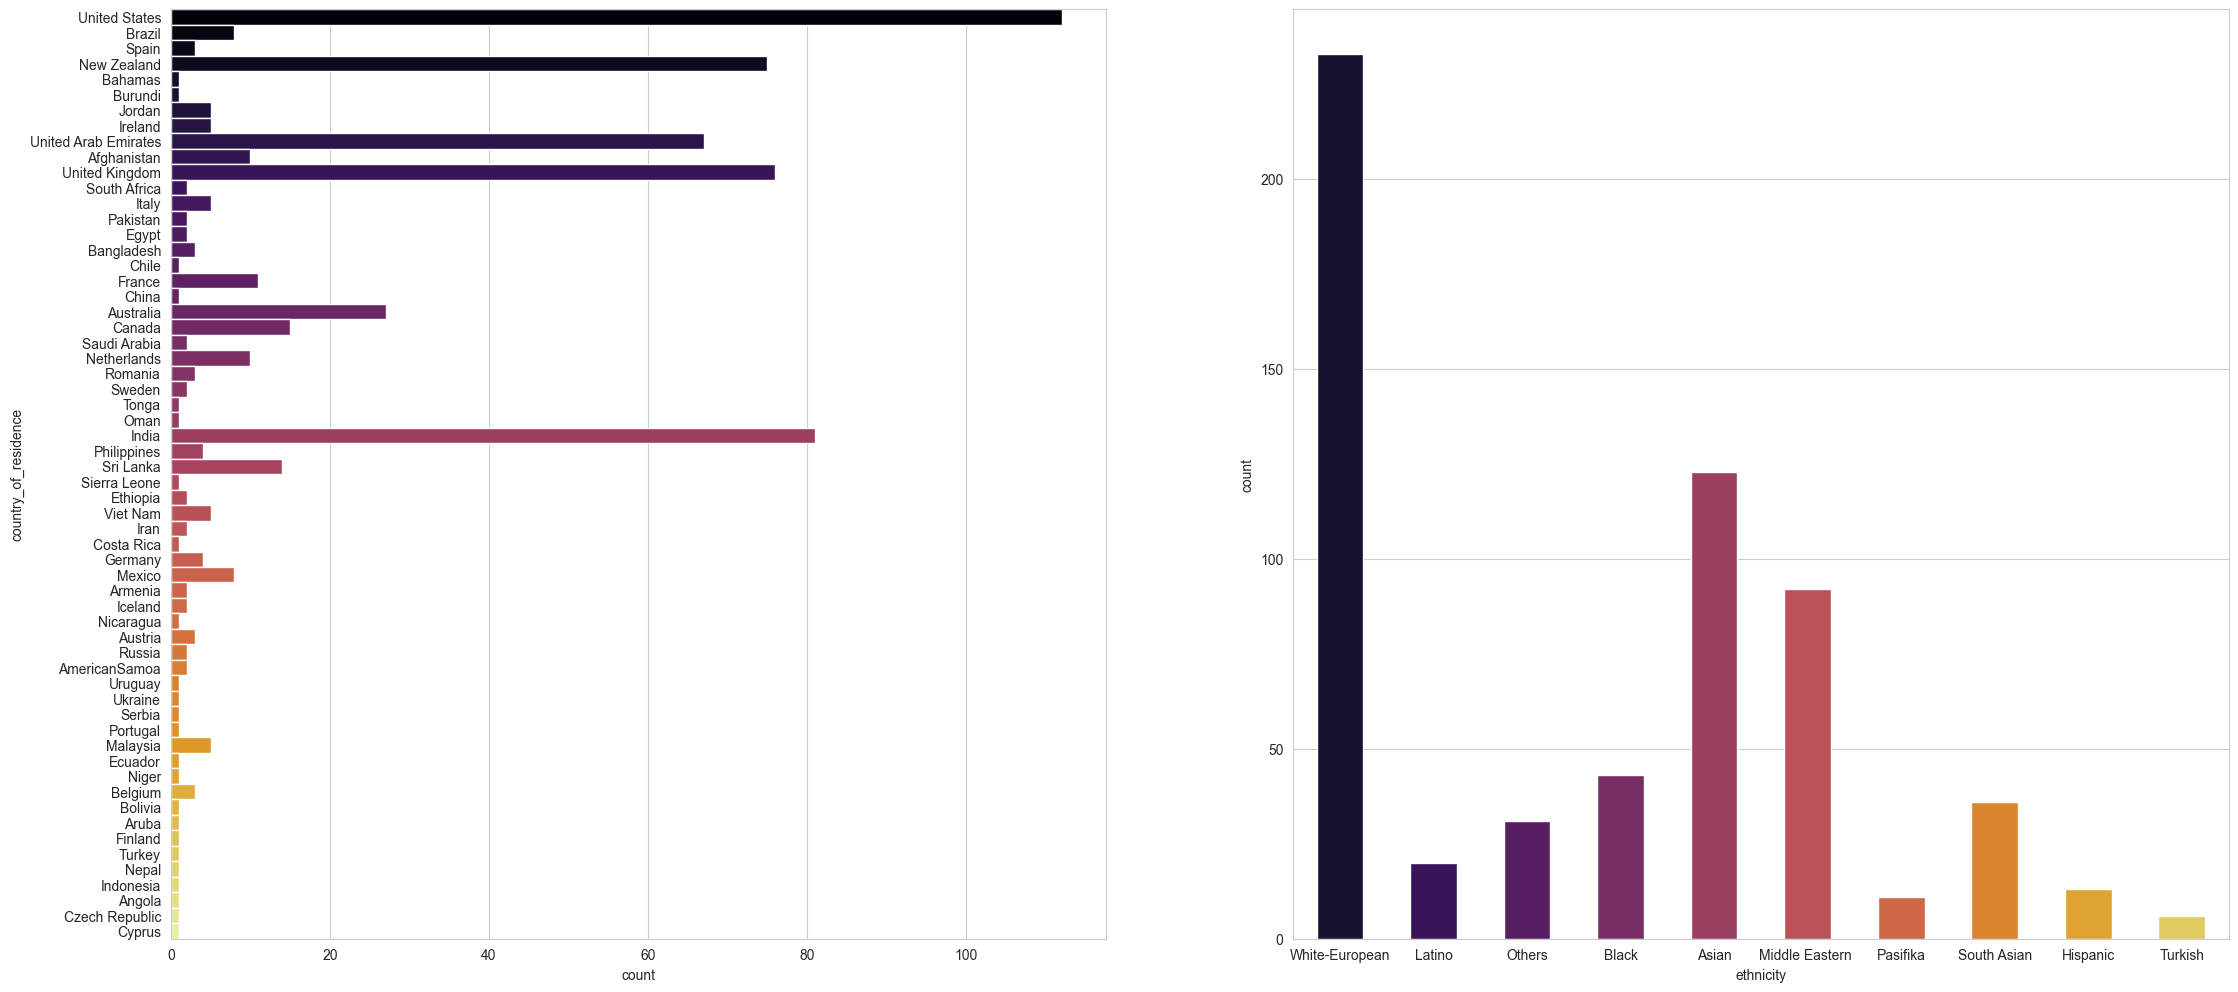

In [220]:
plt.figure(figsize=(70,70)) 

# Plot para país de residência
ax = plt.subplot(5,5, 1)
sns.countplot(df, y = 'country_of_residence', width = 1, palette='inferno')

# Plot para etnia 
ax = plt.subplot(5,5, 2)
sns.countplot(df, x = 'ethnicity', width = 0.5, palette='inferno', orient='h')

--> todo aqui os textos sobre os gráficos

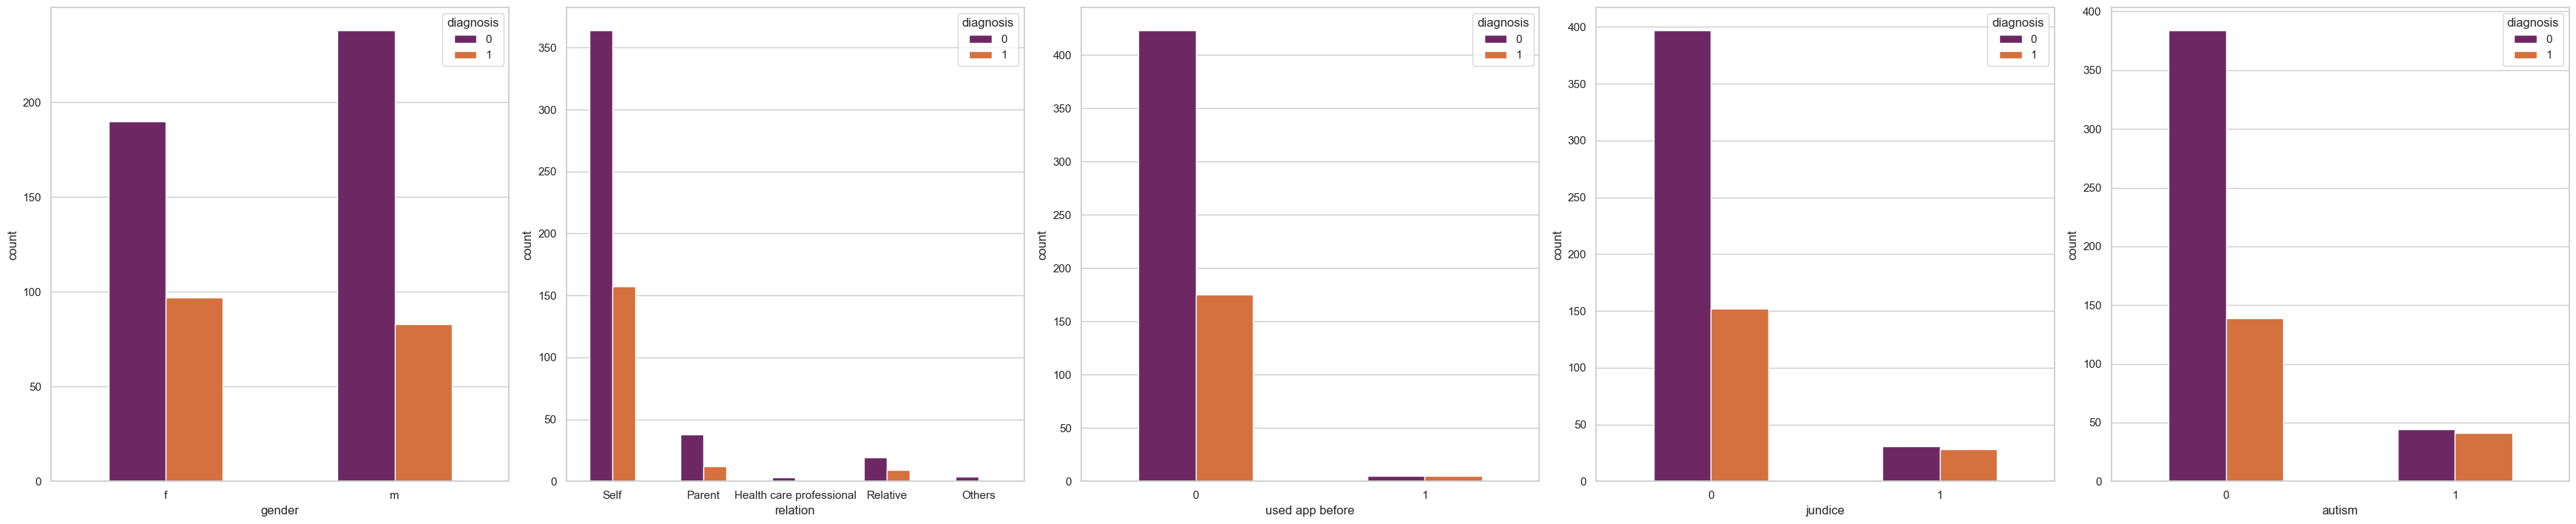

In [253]:

plt.figure(figsize=(35, 35))

# Gender plot

ax = plt.subplot(5,5, 1)
sns.countplot(df, x = 'gender', width = 0.5, palette='inferno', hue= 'diagnosis')
plt.xlabel('gender')


# Relation plot 
ax = plt.subplot(5, 5, 2)
sns.countplot(df, x = 'relation', width = 0.5, palette = 'inferno', hue='diagnosis')
plt.xlabel('relation')

ax = plt.subplot(5, 5, 3)
sns.countplot(df, x = 'used_app_before', width = 0.5, palette = 'inferno', hue='diagnosis')
plt.xlabel('used app before')

ax = plt.subplot(5, 5, 4)
sns.countplot(df, x = 'jundice', width = 0.5, palette = 'inferno', hue='diagnosis')
plt.xlabel('jundice')

ax = plt.subplot(5, 5, 5)
sns.countplot(df, x = 'autism', width = 0.5, palette = 'inferno', hue='diagnosis')
plt.xlabel('autism')


plt.tight_layout() 
plt.show()


Comparando as saídas


<Axes: xlabel='ethnicity', ylabel='count'>

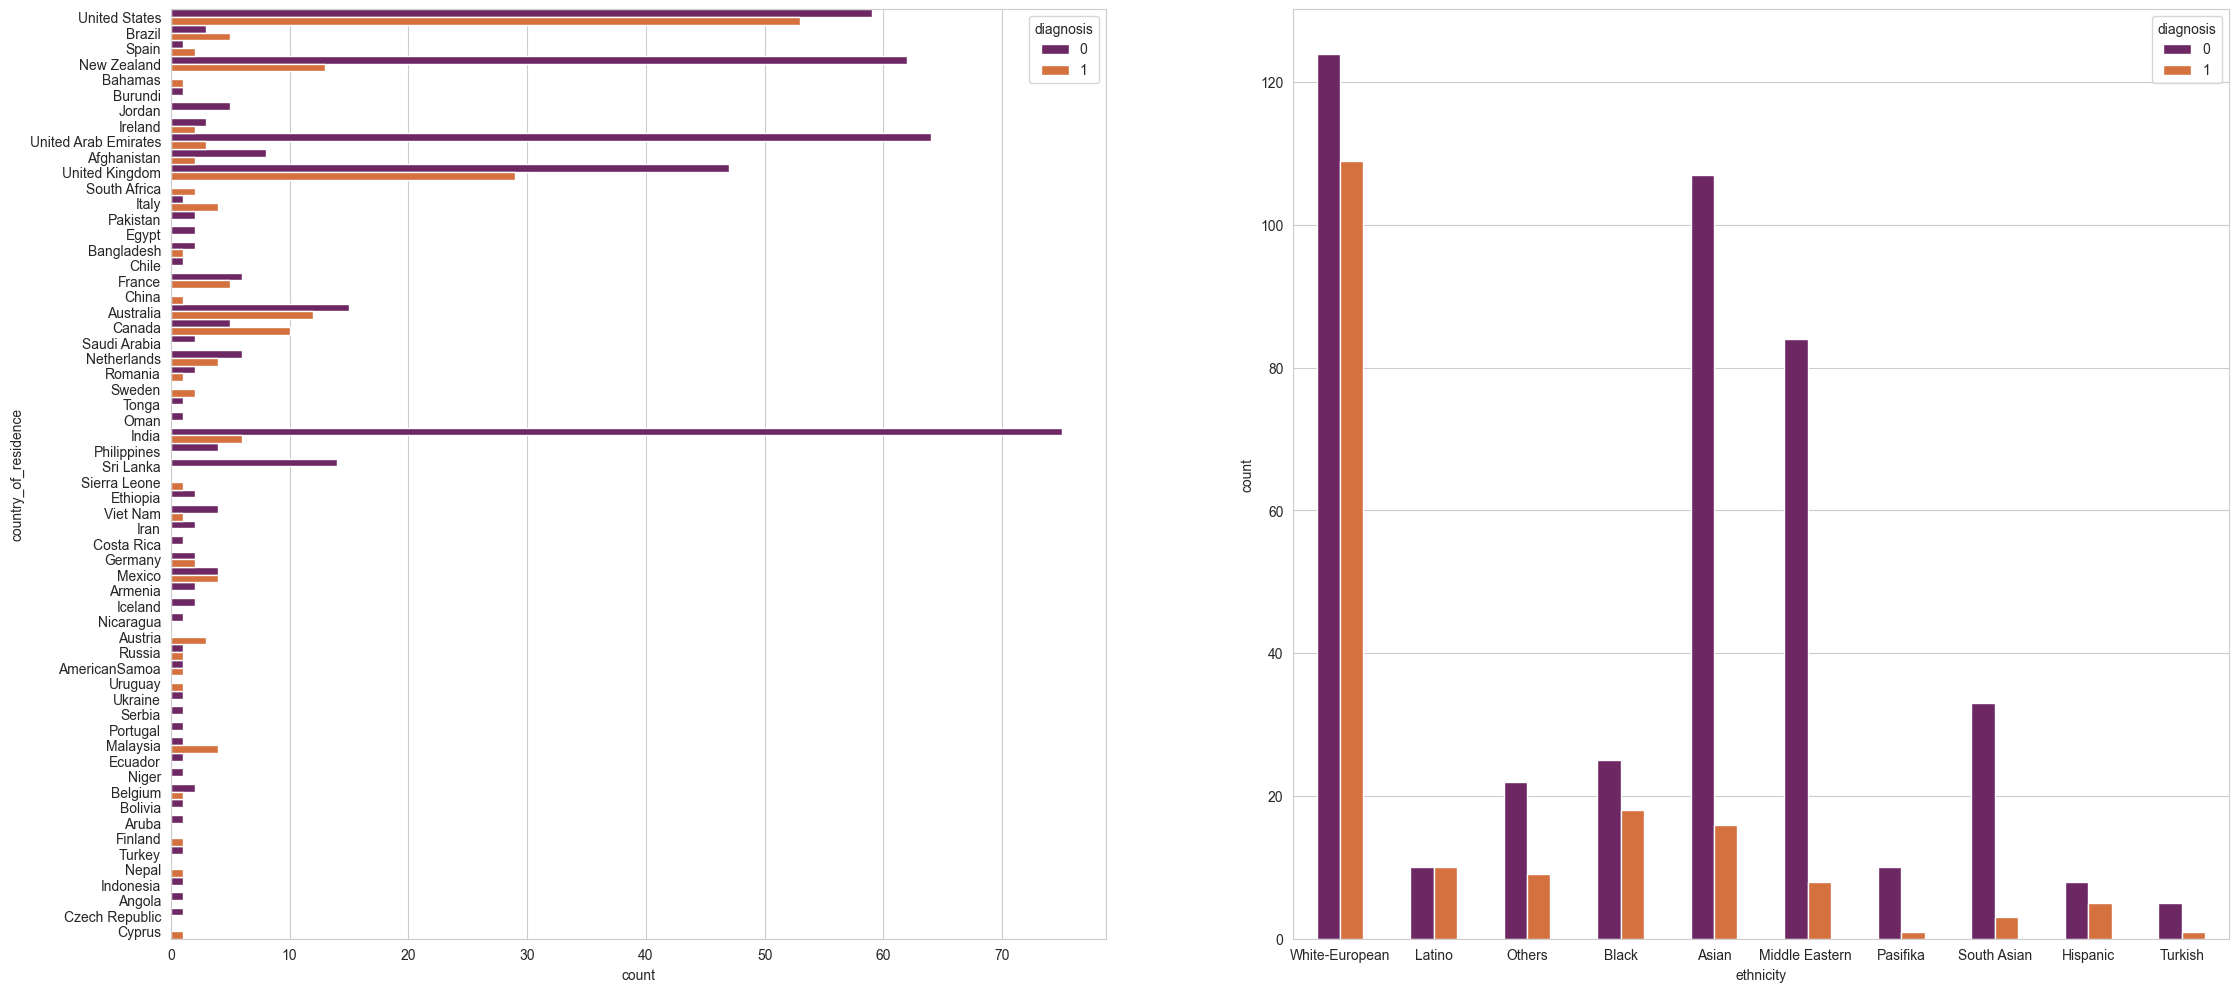

In [222]:
plt.figure(figsize=(70,70)) 

# Plot para país de residência
ax = plt.subplot(5,5, 1)
sns.countplot(df, y = 'country_of_residence', width = 1, palette='inferno', hue='diagnosis')

# Plot para etnia 
ax = plt.subplot(5,5, 2)
sns.countplot(df, x = 'ethnicity', width = 0.5, palette='inferno', orient='h', hue='diagnosis')

Os Estados Unidos e o Reino Unido possuem a maior incidência de diagnósticos positivos. Quanto a Etnia, os latinos possuem a mesma incidência, enquanto os europeus (caucasianos) se destacam como mais incidentes em casos positivos. 

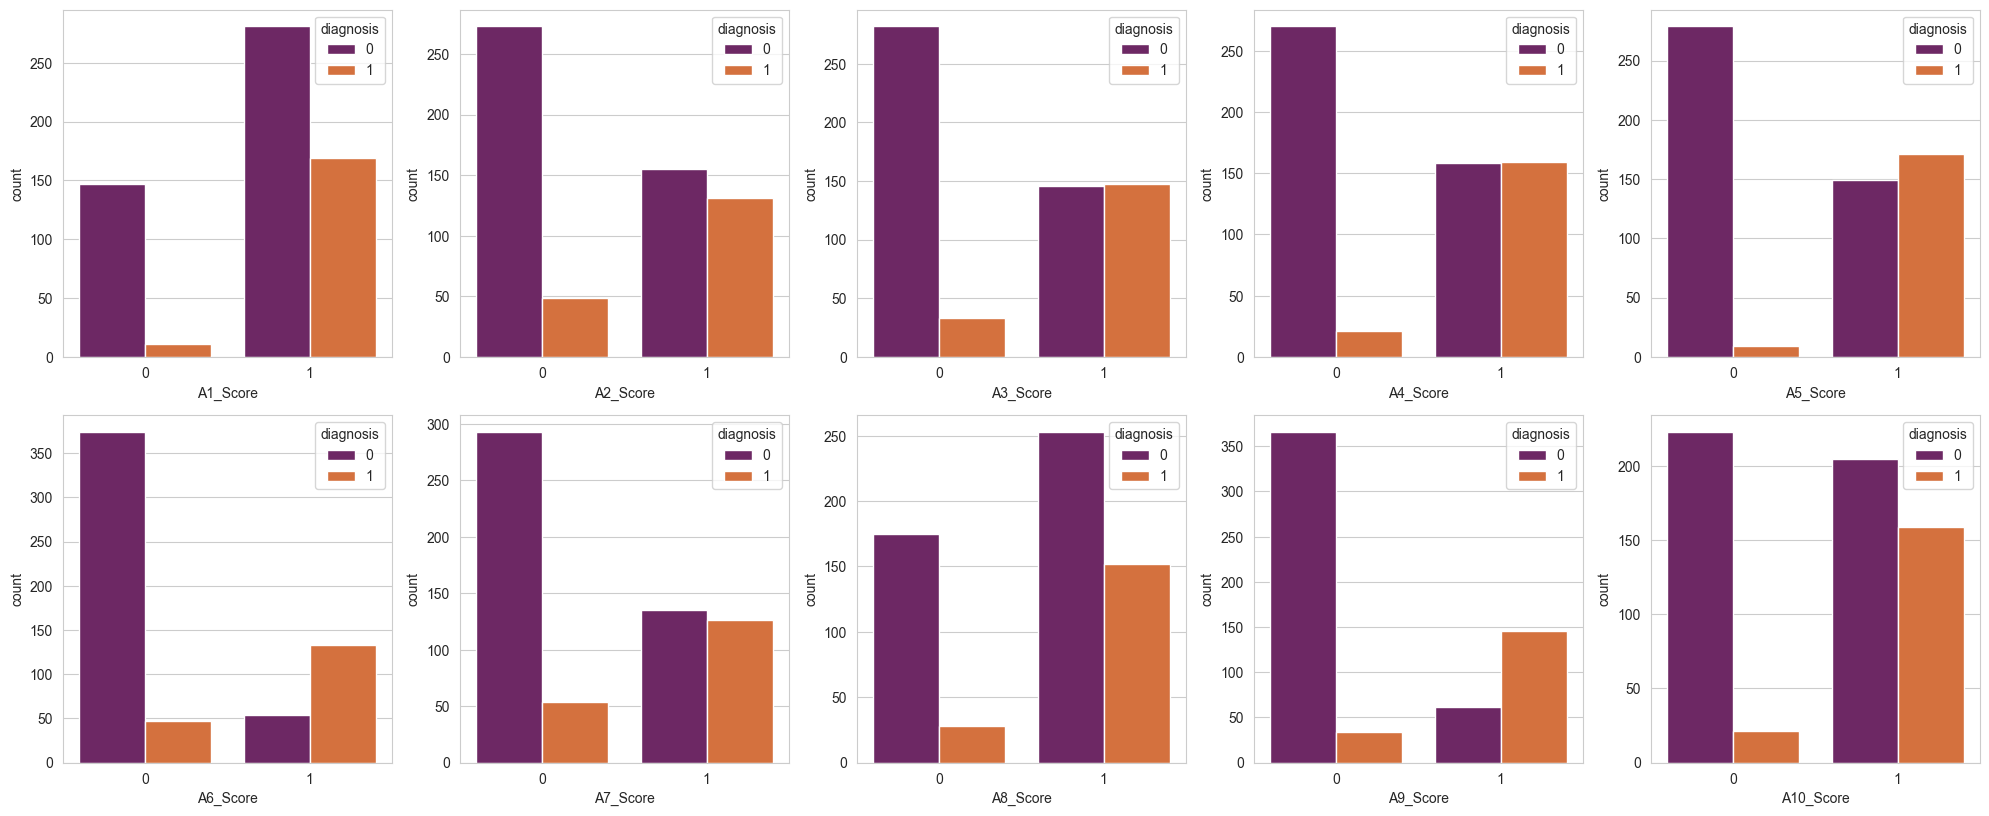

In [223]:
answers = [column for column in df.columns if '_Score' in column]

plt.figure(figsize=(20,20))

plot_number = 1

for answer in answers: 
    ax = plt.subplot(5,5, plot_number)
    sns.countplot(df, x = answer, palette='inferno', hue='diagnosis')

    plot_number += 1

plt.tight_layout() 
plt.show() 

Analisar as respostas para as questões e assim encontrar algum insight. 

Let's finally check 1 assumption: if we summarize all scores, how it will influence on classes.

<Axes: xlabel='result', ylabel='count'>

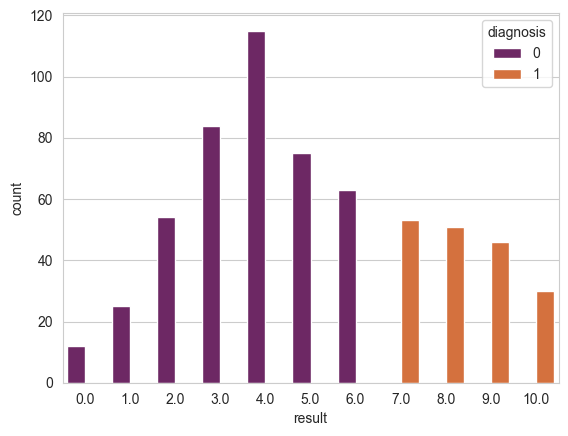

In [224]:
sns.countplot(df, x = 'result', palette='inferno', hue='diagnosis', dodge=True)

Encontramos algo muito interessante aqui. 

<Figure size 4000x4000 with 0 Axes>

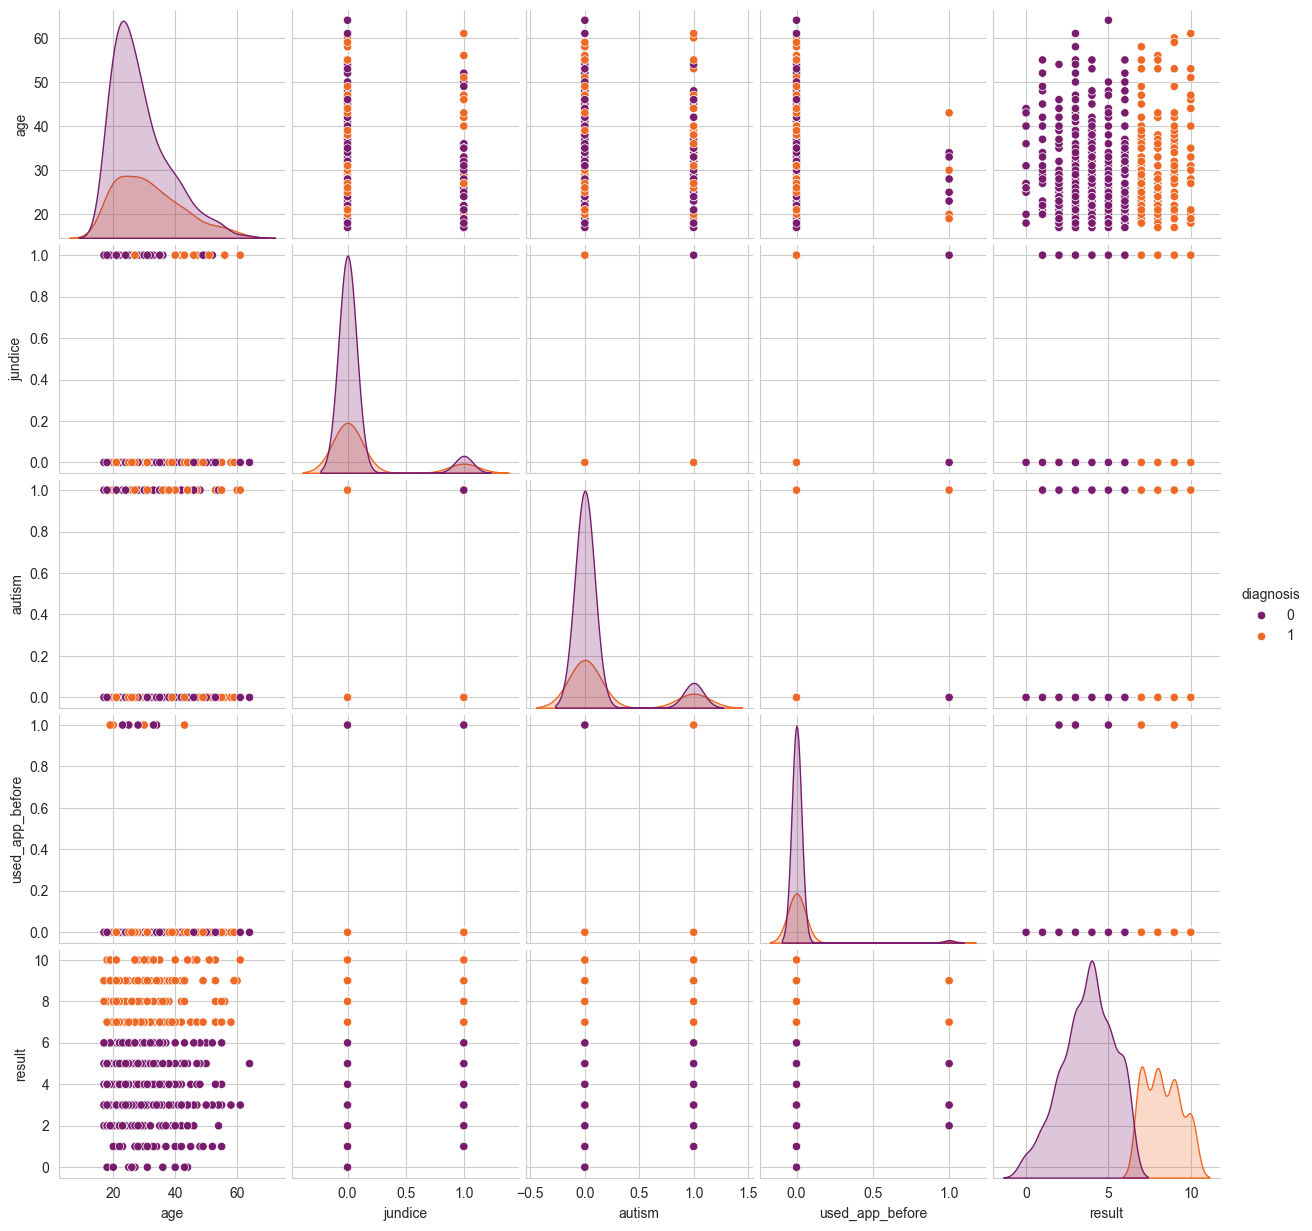

In [225]:
columns = [column for column in df.columns if '_Score' not in column]


plt.figure(figsize=(40,40))

sns.pairplot(df[columns], hue='diagnosis', palette='inferno')

Faixa de idade

<Axes: xlabel='age', ylabel='Count'>

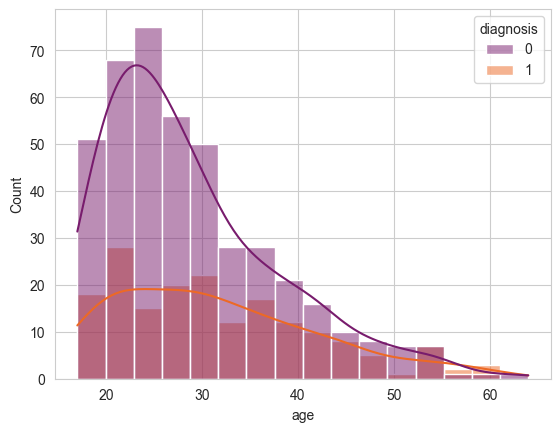

In [226]:
sns.histplot(df, x = 'age', palette= 'inferno', kde=True, hue='diagnosis')

<Axes: ylabel='age'>

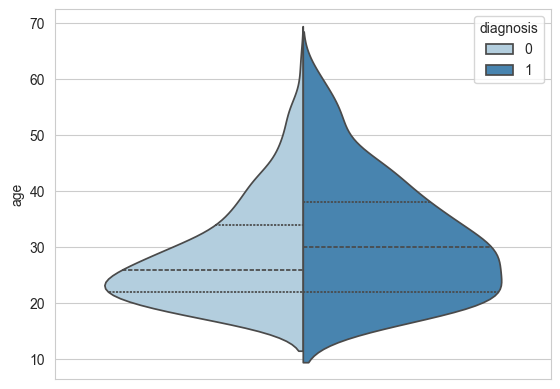

In [235]:
sns.violinplot(data=df, y = 'age', inner='quartile', palette='Blues', hue = 'diagnosis', split=True)


<Axes: xlabel='jundice', ylabel='result'>

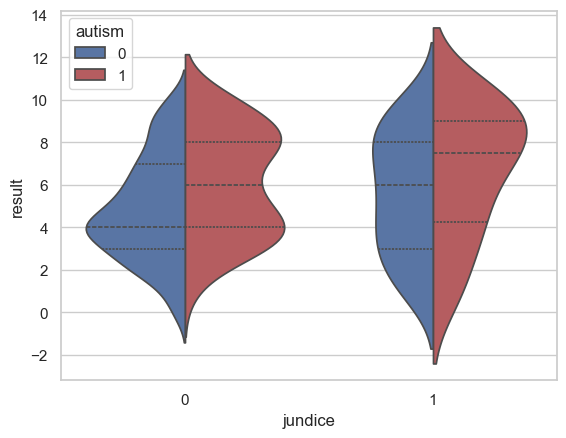

In [242]:
sns.violinplot(x="jundice", y="result", hue="autism", data=df, split=True,
                inner="quartile", palette={ 1 : "r", 0 : "b"})

<Axes: xlabel='jundice', ylabel='result'>

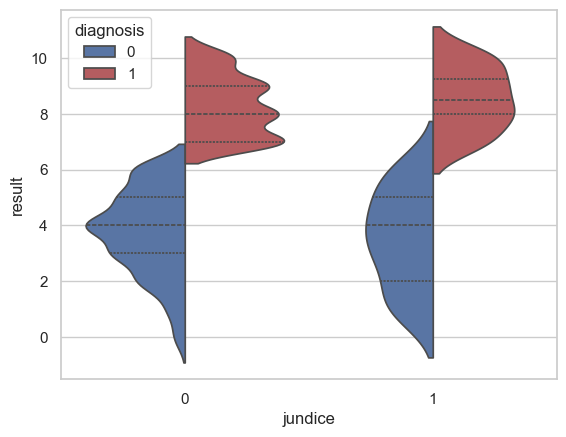

In [243]:
sns.violinplot(x="jundice", y="result", hue="diagnosis", data=df, split=True,
                inner="quartile", palette={ 1 : "r", 0 : "b"})

<Axes: xlabel='gender', ylabel='result'>

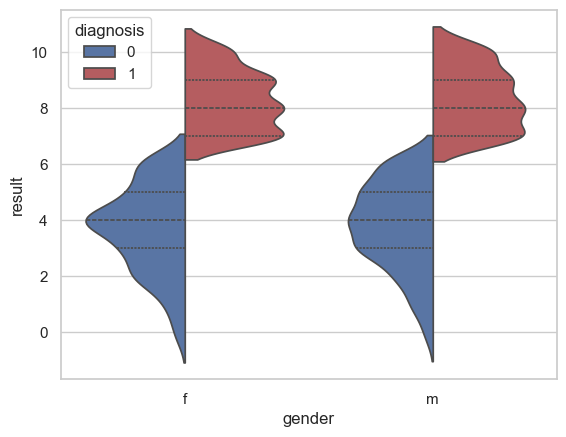

In [244]:
sns.violinplot(x="gender", y="result", hue="diagnosis", data=df, split=True,
                inner="quartile", palette={ 1 : "r", 0 : "b"})

<Axes: xlabel='autism', ylabel='result'>

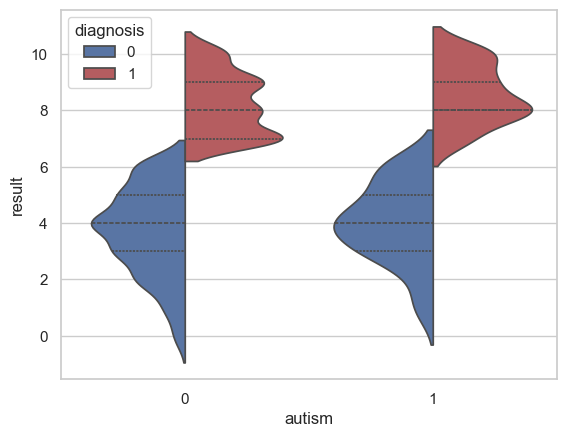

In [254]:
sns.violinplot(x="autism", y="result", hue="diagnosis", data=df, split=True,
                inner="quartile", palette={ 1 : "r", 0 : "b"})

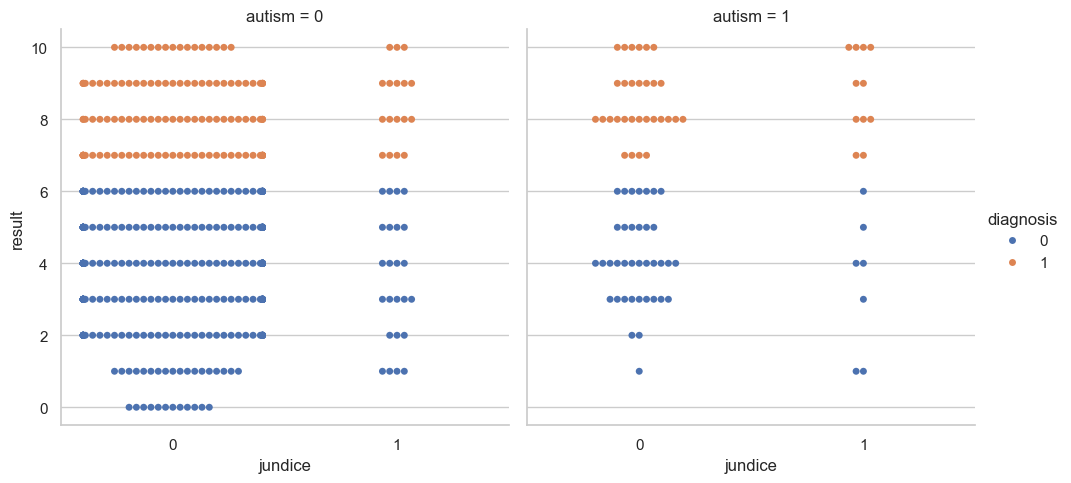

In [258]:
sns.catplot(x="jundice", y="result", hue="diagnosis", col="autism", data=df, kind="swarm");

<Axes: >

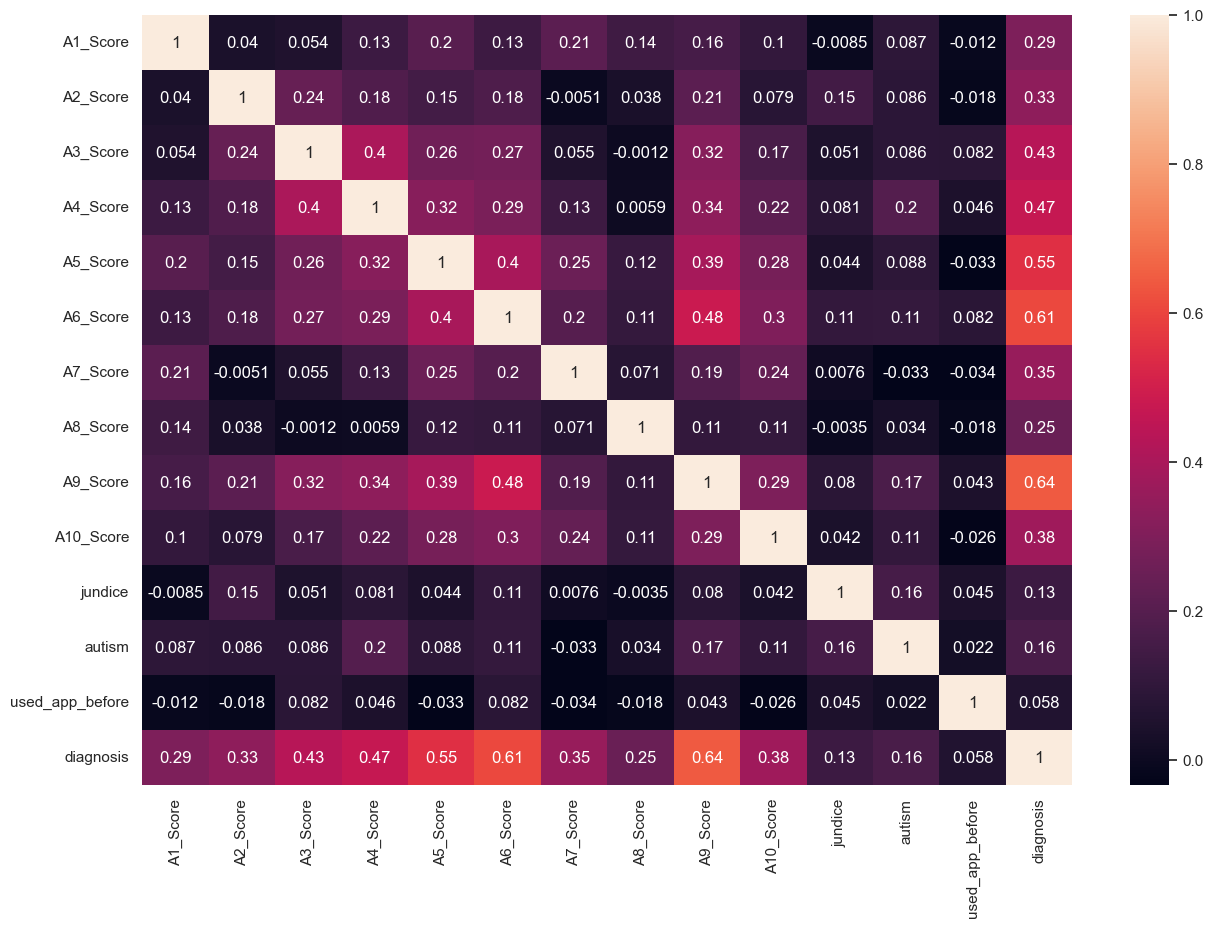

In [267]:
plt.figure(figsize=(15,10))

sns.heatmap(df[[col for col in numeric_columns if col != 'age' and col != 'result']].corr(), annot=True)
